In [2]:
%run '/mnt/berger2/equipes/IGE/meom/workdir/berger2/fonctions/meom_fonctions/fonctions.ipynb'

import numpy as np
import matplotlib.pyplot as plt
import scipy.io.netcdf as netcdf
import qgutils as qg
from matplotlib import ticker, cm
plt.ion()

In [3]:
#paramètres gravés dans le marbre pour le stage

Delta = 10000                               #grid spacing
f0 = 9.37456E-05                           #paramètre de Coriolis
dh = np.array([350,750,2900])              #hauteurs des couches océaniques
dh_b = np.array([(dh[0]+dh[1])/2,(dh[0]+dh[1])/2])
g_prime = np.array([2.5E-02,1.25E-02])     #gravités réduites aux interfaces
Beta = 1.75360E-11
delta_ek = 5                               #ocean bottom Ekman thickness 
nu4 = 2E09                                 #bi-harmonic viscosity
Ht = np.sum(dh)
Ht_b = np.sum(dh_b)
toc = np.array([1.31693E+01,1.81693E+01,2.41693E+01])
bf = delta_ek*f0/(2*dh[-1])

#fréquences Brunt-vaisala

N_12 = g_prime[0]/((dh[0]+dh[1])/2)
N_23 = g_prime[1]/((dh[1]+dh[2])/2)
N2 = np.array([N_12,N_23])

In [4]:
dir_abs  = '/mnt/berger2/equipes/IGE/meom/workdir/berger2/qgcm-data/double_gyre_coupled/outdata_7_dt10/'
dir_rel  = '/mnt/berger2/equipes/IGE/meom/workdir/berger2/qgcm-data/double_gyre_coupled/outdata_6tdiff_dt10/'

file0 = 'ocpo.nc'
file1 = 'ocsst.nc'
file_avges='avges.nc'

In [5]:
#get fields psi
pfile_abs = dir_abs + file0
pfile_rel = dir_rel + file0

toc_file_abs = dir_abs + file1
toc_file_rel = dir_rel + file1


f_abs = netcdf.netcdf_file(dir_abs + file0,'r')
f_rel = netcdf.netcdf_file(dir_rel + file0,'r')


In [16]:
si_t = f_abs.variables['time'][:].copy().size
si_x = f_abs.variables['xp'][:-1].copy()
si_y = f_abs.variables['yp'][:-1].copy()

p = qg.read_qgcm(pfile_abs, 0, var='p', rescale = 1/f0, interp = True, subtract_bc = False )

nz,ny,nx = p.shape

In [7]:
%%time
p_me_rel = np.zeros((nz,ny,nx))
p_me_abs = np.zeros((nz,ny,nx))
n_me=1

for i in range (0,73):
    p_abs = qg.read_qgcm(pfile_abs, i, var='p', rescale = 1/f0, interp = True, subtract_bc = True)
    p_rel = qg.read_qgcm(pfile_rel, i, var='p', rescale = 1/f0, interp = True, subtract_bc = True)
    
    p_me_rel +=(p_rel-p_me_rel)/n_me
    p_me_abs +=(p_abs-p_me_abs)/n_me
    
    n_me+=1

CPU times: user 3 s, sys: 264 ms, total: 3.27 s
Wall time: 56.1 s


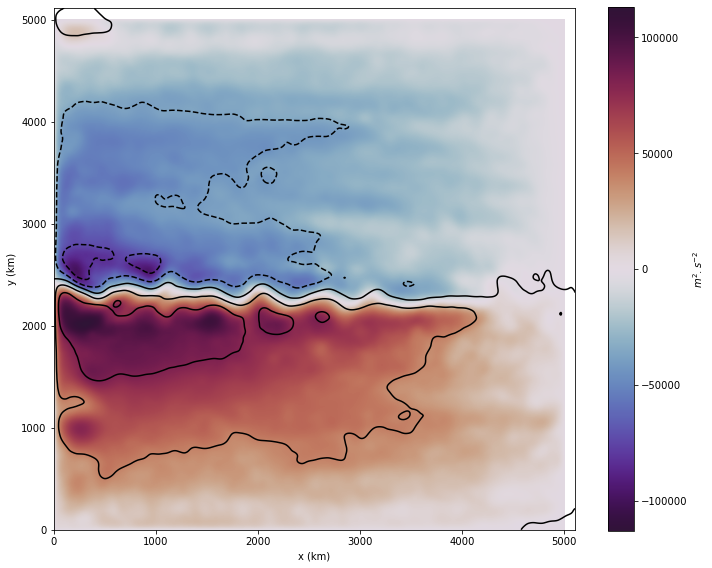

In [23]:
maxi = max(np.max(p_me_abs[0]),np.abs(np.min(p_me_abs[0])))

fig, ax2 = plt.subplots(1, 1, figsize = (10,8), tight_layout = True)



col = ax2.imshow(p_me_abs[0], extent= [0,5000,0,5000],origin='lower',cmap='twilight_shifted', vmax = maxi, vmin = -maxi)
ax2.contour(si_x,si_y,p_me_abs[0], levels = 5,colors = 'black')
ax2.set_aspect('equal')
#ax2.set_title('abs')
ax2.set_xlabel('x (km)')
ax2.set_ylabel('y (km)')

m2 = plt.cm.ScalarMappable(cmap='twilight_shifted')
m2.set_array(p_me_abs[0])
m2.set_clim(-maxi, maxi)
plt.colorbar(m2, ax= ax2).set_label(r'$m^2.s^{-2}$')

plt.savefig('/mnt/berger2/equipes/IGE/meom/workdir/berger2/git/meom_test/meom_test/sat_data/figs_sat/qgcm_abs.png')

In [9]:
help(plt.contour)

Help on function contour in module matplotlib.pyplot:

contour(*args, data=None, **kwargs)
    Plot contours.
    
    Call signature::
    
        contour([X, Y,] Z, [levels], **kwargs)
    
    `.contour` and `.contourf` draw contour lines and filled contours,
    respectively.  Except as noted, function signatures and return values
    are the same for both versions.
    
    Parameters
    ----------
    X, Y : array-like, optional
        The coordinates of the values in *Z*.
    
        *X* and *Y* must both be 2-D with the same shape as *Z* (e.g.
        created via `numpy.meshgrid`), or they must both be 1-D such
        that ``len(X) == M`` is the number of columns in *Z* and
        ``len(Y) == N`` is the number of rows in *Z*.
    
        If not given, they are assumed to be integer indices, i.e.
        ``X = range(M)``, ``Y = range(N)``.
    
    Z : array-like(N, M)
        The height values over which the contour is drawn.
    
    levels : int or array-like, optional